# Creacion de la SVM para la deteccion de estres

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sb 
import matplotlib as pt
import keras 
import tensorflow as tf 
import tensorboard 
import os 
import sys
import csv 
import warnings 

Using TensorFlow backend.


In [3]:
data=pd.read_csv('/home/roberto/Escritorio/IJNS-DSVM/SVM/SVM/dataset_df/40_seg_dataset_df.csv')
df=pd.DataFrame(data)

df.head()

M      SD       MA            MI       DR        FM       FD  \
0  15.943  17.074   69.050  9.685500e-03   69.040 -0.015847  0.90661   
1   3.792   2.286   10.893  4.482500e-01   10.444 -0.004043  0.21755   
2  23.542  15.626   44.475  8.375100e-01   43.638  0.016417  0.91163   
3  15.174  15.491   53.104  1.727900e-05   53.104  0.107200  0.57675   
4  33.489  25.562  100.100 -1.136900e-13  100.100 -0.097454  1.46100   

         SM       SSD      AL  ...       RM       IL       EL        SK  \
0  0.000774  0.188010  1.2571  ...  23.3450  12.6830  18.5710  1.424300   
1  0.000039  0.071463  1.0200  ...   4.4263   3.7175   4.3393  1.613200   
2  0.001231  0.158670  1.2720  ...  28.2450  18.5070  22.2050 -0.099134   
3  0.000076  0.129720  1.1363  ...  21.6710  13.3540  19.0710  1.196800   
4 -0.000310  0.220470  1.5344  ...  42.1110  21.8260  27.4450  0.887410   

       KU           MO        F1        F2        F3  Class  
0  3.9925  14394000.00    2.1824    1.4429    2.5904      1  
1  5.1087       815.51    3.0226    3.4887    4.1088      1  
2  1.3472   -223590.00    4.8371    1.4814    1.0039      1  
3  3.0761   5466500.00  264.0300  270.9200  250.5700      1  
4  3.1433  63031000.00   41.3840   59.4100   73.0440      1  

[5 rows x 22 columns]

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Escalado de los datos 

In [5]:
#x=data.iloc[:,:-1]
#y=data.iloc[]#Hay que arreglar el conjunto de salida 

x = data.drop('Class', axis=1)
y = data['Class']


#x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.35)

Escalado

In [6]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [7]:
x.head()

M      SD       MA            MI       DR        FM       FD  \
0  15.943  17.074   69.050  9.685500e-03   69.040 -0.015847  0.90661   
1   3.792   2.286   10.893  4.482500e-01   10.444 -0.004043  0.21755   
2  23.542  15.626   44.475  8.375100e-01   43.638  0.016417  0.91163   
3  15.174  15.491   53.104  1.727900e-05   53.104  0.107200  0.57675   
4  33.489  25.562  100.100 -1.136900e-13  100.100 -0.097454  1.46100   

         SM       SSD      AL  ...        AP       RM       IL       EL  \
0  0.000774  0.188010  1.2571  ...   545.000  23.3450  12.6830  18.5710   
1  0.000039  0.071463  1.0200  ...    19.592   4.4263   3.7175   4.3393   
2  0.001231  0.158670  1.2720  ...   797.790  28.2450  18.5070  22.2050   
3  0.000076  0.129720  1.1363  ...   469.610  21.6710  13.3540  19.0710   
4 -0.000310  0.220470  1.5344  ...  1773.300  42.1110  21.8260  27.4450   

         SK      KU           MO        F1        F2        F3  
0  1.424300  3.9925  14394000.00    2.1824    1.4429    2.5904  
1  1.613200  5.1087       815.51    3.0226    3.4887    4.1088  
2 -0.099134  1.3472   -223590.00    4.8371    1.4814    1.0039  
3  1.196800  3.0761   5466500.00  264.0300  270.9200  250.5700  
4  0.887410  3.1433  63031000.00   41.3840   59.4100   73.0440  

[5 rows x 21 columns]

In [8]:
y.head()


0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

Reduccion de las 22 dimensiones

In [9]:
warnings.filterwarnings('ignore')
X_reduced1 = PCA(n_components=3).fit_transform(x_scaled)


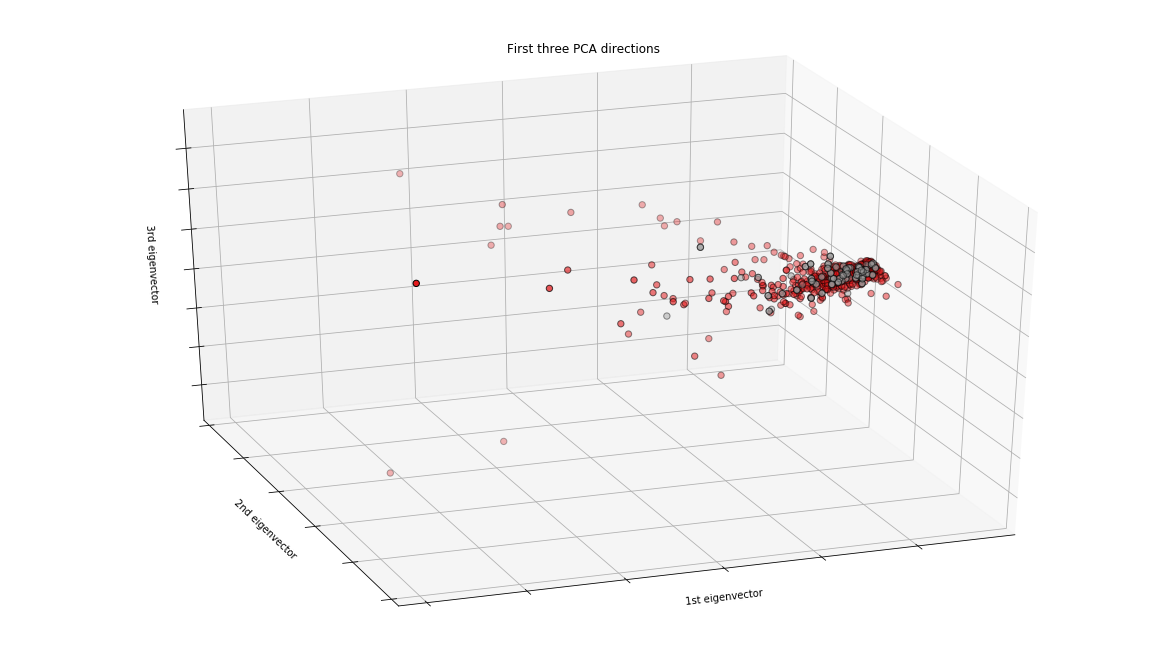

The number of features in the new subspace is  3


In [10]:
fig = plt.figure(1, figsize=(16, 9))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(x_scaled)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
print("The number of features in the new subspace is " ,X_reduced.shape[1])

fig1 = plt.figure(1, figsize=(16, 9))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(x_scaled)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
print("The number of features in the new subspace is " ,X_reduced.shape[1])

In [11]:
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(
                        X_reduced1, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.svm import LinearSVC

clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                , random_state=0, max_iter=1000)
clf.fit(X_train,y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of linear SVC on training set: 0.56
Accuracy of linear SVC on test set: 0.59


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
warnings.filterwarnings('ignore')

from tqdm import tqdm_notebook as tqdm

c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}

print("Start fitting")
for cv in tqdm(range(2,10)):
    grid = GridSearchCV(clf, param_grid =param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train, y_train)
    print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
    print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

Start fitting


The best parameters are {'C': 0.7430147299885189} with a score of 76
Best estimator accuracy on test set 78.01 
The best parameters are {'C': 0.7430147299885189} with a score of 76
Best estimator accuracy on test set 78.01 
The best parameters are {'C': 0.7430147299885189} with a score of 76
Best estimator accuracy on test set 78.01 
The best parameters are {'C': 0.7430147299885189} with a score of 76
Best estimator accuracy on test set 78.01 
The best parameters are {'C': 0.7430147299885189} with a score of 76
Best estimator accuracy on test set 78.01 
The best parameters are {'C': 0.7430147299885189} with a score of 76
Best estimator accuracy on test set 78.01 
The best parameters are {'C': 0.7430147299885189} with a score of 76
Best estimator accuracy on test set 78.01 
The best parameters are {'C': 0.7430147299885189} with a score of 76
Best estimator accuracy on test set 78.01 



In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
warnings.filterwarnings('ignore')
    
c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}

grid = GridSearchCV(clf, param_grid =param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)
  
print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'C': 0.7430147299885189} with a score of 76
Best estimator accuracy on test set 78.01 


In [17]:
from sklearn.svm import SVC

clf_SVC = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)
clf_SVC.fit(X_train,y_train)

print('Accuracy of SVC on training set: {:.2f}'.format(clf_SVC.score(X_train, y_train) * 100))

print('Accuracy of SVC on test set: {:.2f}'.format(clf_SVC.score(X_test, y_test) * 100))

Accuracy of SVC on training set: 81.32
Accuracy of SVC on test set: 76.60


In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
    
c_SVC = np.logspace(start = 0, stop = 10, num = 100, base = 2 , dtype = 'float64')
print( 'the generated array of c values')
print ( c_SVC )
param_grid_S = {'C': c_SVC}

print("\n Array of means \n")
clf = GridSearchCV(clf_SVC, param_grid =param_grid_S, cv=5 , scoring='accuracy')
clf.fit(X_train, y_train)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

print(means)
print( '\nArrays of Standards Deviations\n' )
print(stds)

y_true, y_pred = y_test, clf.predict(X_test)
print( '\nClassification report\n' )
print(classification_report(y_true, y_pred))

the generated array of c values
[1.00000000e+00 1.07252413e+00 1.15030800e+00 1.23373308e+00
 1.32320850e+00 1.41917304e+00 1.52209732e+00 1.63248610e+00
 1.75088073e+00 1.87786182e+00 2.01405211e+00 2.16011948e+00
 2.31678026e+00 2.48480272e+00 2.66501086e+00 2.85828845e+00
 3.06558332e+00 3.28791207e+00 3.52636502e+00 3.78211156e+00
 4.05640590e+00 4.35059319e+00 4.66611616e+00 5.00452215e+00
 5.36747075e+00 5.75674188e+00 6.17424455e+00 6.62202624e+00
 7.10228290e+00 7.61736977e+00 8.16981285e+00 8.76232139e+00
 9.39780109e+00 1.00793684e+01 1.08103658e+01 1.15943781e+01
 1.24352503e+01 1.33371059e+01 1.43043679e+01 1.53417796e+01
 1.64544288e+01 1.76477719e+01 1.89276611e+01 2.03003732e+01
 2.17726400e+01 2.33516817e+01 2.50452420e+01 2.68616263e+01
 2.88097423e+01 3.08991436e+01 3.31400770e+01 3.55435321e+01
 3.81212958e+01 4.08860094e+01 4.38512315e+01 4.70315038e+01
 5.04424225e+01 5.41007151e+01 5.80243221e+01 6.22324854e+01
 6.67458420e+01 7.15865259e+01 7.67782761e+01 8.23465

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print (confusion_matrix(y_test,y_pred))

NameError: name 'y_pred' is not defined

# Metodo tradicional 



In [20]:
from tqdm import tqdm_notebook as tqdm 


In [21]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30, random_state=30)

In [22]:
from sklearn.svm import SVC 
model=SVC()

In [23]:
model=SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=True)

In [24]:
 %time model.fit(x_train,y_train)

[LibSVM]CPU times: user 18.7 ms, sys: 14 µs, total: 18.7 ms
Wall time: 16.6 ms


SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [25]:
pred=model.predict(x_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print (confusion_matrix(y_test,pred))

[[153   1]
 [ 17  40]]


In [28]:
model.score(x_test,y_test)

0.9146919431279621

In [29]:
print('--------------------------------------------------------------------------------------------------------------------')
print(classification_report(y_test,pred))

--------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.90      0.99      0.94       154
           2       0.98      0.70      0.82        57

   micro avg       0.91      0.91      0.91       211
   macro avg       0.94      0.85      0.88       211
weighted avg       0.92      0.91      0.91       211

